In [41]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Read mails dataset
df = pd.read_csv("data/mails_labeled.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
# Checking shape of the dataset
df.shape

(5171, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
# Check missing values
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [6]:
# Create label column
df['important']= df['label'].map({'ham': 1, 'spam': 0})
# Removing Unnecessary column
df.drop(['Unnamed: 0', 'label_num', 'label'], axis=1, inplace = True)
df

,text,important
0,Subject: enron methanol ; meter # : 988291\r\n...,1
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",1
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",1
3,"Subject: photoshop , windows , office . cheap ...",0
4,Subject: re : indian springs\r\nthis deal is t...,1
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,1
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1
5168,Subject: calpine daily gas nomination\r\n>\r\n...,1
5169,Subject: industrial worksheets for august 2000...,1


<AxesSubplot:xlabel='important', ylabel='count'>

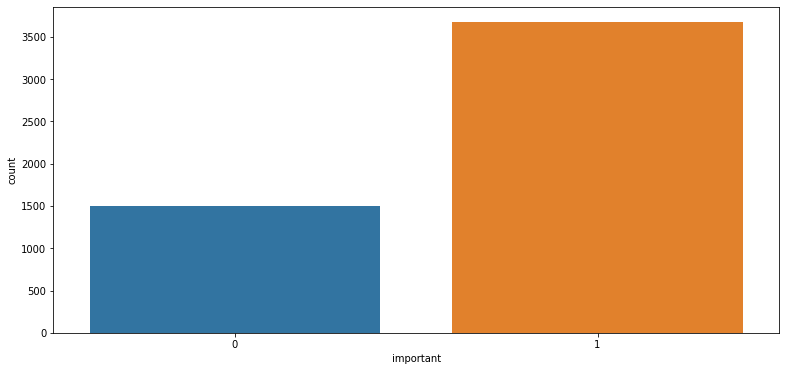

In [7]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x = 'important')

In [8]:
print(df["text"][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


### Remove stopwords from the data

In [9]:
stop_words = set(stopwords.words('english')) 
df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

In [10]:
df.head()

,text,important
0,Subject : enron methanol ; meter # : 988291 fo...,1
1,"Subject : hpl nom january 9 , 2001 ( see attac...",1
2,"Subject : neon retreat ho ho ho , ' around won...",1
3,"Subject : photoshop , windows , office . cheap...",0
4,Subject : : indian springs deal book teco pvr ...,1


In [11]:
# Extracting independent and dependent variable
X = df.loc[:, 'text']
y = df.loc[:, 'important']

In [12]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (4136,)
Test Data Shape: (1035,)


In [14]:
# Converting text to vector
count_vec = CountVectorizer()
count_vec.fit(X_train)

CountVectorizer()

In [15]:
X_train_vec = count_vec.transform(X_train)
X_train_vec

<4136x45094 sparse matrix of type '<class 'numpy.int64'>'
	with 288773 stored elements in Compressed Sparse Row format>

In [16]:
# Convert vector to array
X_train_vec = X_train_vec.toarray()
X_train_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

### Model creation

In [17]:
## Logistic Regression using hyperparameter tuning
log_reg = LogisticRegression(verbose=1)

grid = {"C": [float(i) for i in range(1, 3)], "penalty": ["l2"], "solver": [ 'lbfgs', 'liblinear']}
logreg_cv=GridSearchCV(log_reg, grid, cv=4)
logreg_cv.fit(X_train_vec, y_train)
print("Tuned Hpyerparameters :", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Tuned Hpyerparameters : {'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9770309477756287


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.4s finished


In [19]:
%%time
# Tuned Hpyerparameters : {'C': 2.0, 'penalty': 'l2', 'solver': 'lbfgs'}
# accuracy : 0.9770309477756287
log_reg = LogisticRegression(solver='lbfgs', penalty ='l2' , C = 2.0)
log_reg.fit(X_train_vec, y_train)

CPU times: user 1min 48s, sys: 34.5 s, total: 2min 23s
Wall time: 18.9 s


LogisticRegression(C=2.0)

In [20]:
# For test data

# Vectorize test data
X_test_vec = count_vec.transform(X_test)
X_test_vec = X_test_vec.toarray()
print(f"Number of Observations: {X_test_vec.shape[0]}\nTokens/Features: {X_test_vec.shape[1]}")

Number of Observations: 1035
Tokens/Features: 45094


In [21]:
pred = log_reg.predict(X_test_vec)

In [24]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.77777777777777


In [25]:
# Classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       293
           1       0.99      0.98      0.98       742

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



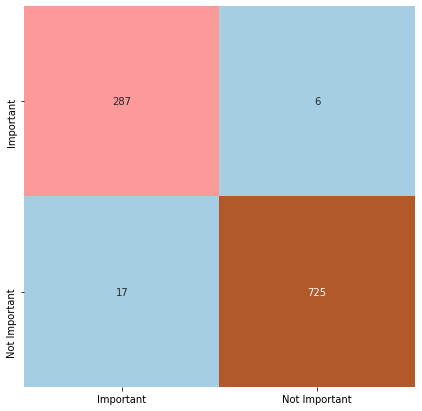

In [27]:
# Confusion matrix
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (7, 7))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Important', 'Not Important'], yticklabels=['Important', 'Not Important']);

In [30]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred = nb_model.predict(X_test_vec)

In [31]:
print(accuracy_score(y_test, y_pred))

0.9729468599033816


In [32]:
print(confusion_matrix(y_test, y_pred))

[[278  15]
 [ 13 729]]


In [39]:
## Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_vec, y_train)
y_pred_dt = dt_clf.predict(X_test_vec)

In [40]:
print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

0.9410628019323671
[[269  24]
 [ 37 705]]


In [44]:
## Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_vec, y_train)
y_pred_rf = rf_clf.predict(X_test_vec)

In [45]:
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.9729468599033816
[[283  10]
 [ 18 724]]
